In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
data_df = pd.read_csv("Resources/Heart_disease_data.csv")
data_df.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


In [3]:
data_df.count()

AGE                  68783
GENDER               68783
HEIGHT               68783
WEIGHT               68783
AP_HIGH              68783
AP_LOW               68783
CHOLESTEROL          68783
GLUCOSE              68783
SMOKE                68783
ALCOHOL              68783
PHYSICAL_ACTIVITY    68783
CARDIO_DISEASE       68783
dtype: int64

In [4]:
data_df.duplicated().sum()

3820

In [5]:
values_entered = data_df.replace({"GENDER": {1 : "Female", 2 : "Male"}, 
                          "CHOLESTEROL": {1: "Normal", 2: "Above Normal", 3: "High"},
                          "GLUCOSE": {1: "Normal", 2: "Above Normal", 3: "High"},
                          "SMOKE": {0: "Non-Smoker", 1: "Smoker"},
                          "ALCOHOL": {0: "Non-Drinker", 1: "Drinker"},
                          "PHYSICAL_ACTIVITY": {0: "Does not Exercise", 1: "Does Exercise"},
                          "CARDIO_DISEASE": {0: "No Cardio related Diesease", 1: "Evidence of Cardio Disease"}})
values_entered

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,Male,168,62,110,80,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease
1,55,Female,156,85,140,90,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
2,52,Female,165,64,130,70,High,Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease
3,48,Male,169,82,150,100,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
4,48,Female,156,56,100,60,Normal,Normal,Non-Smoker,Non-Drinker,Does not Exercise,No Cardio related Diesease
...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,Male,168,76,120,80,Normal,Normal,Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease
68779,62,Female,158,126,140,90,Above Normal,Above Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
68780,52,Male,183,105,180,90,High,Normal,Non-Smoker,Drinker,Does not Exercise,Evidence of Cardio Disease
68781,61,Female,163,72,135,80,Normal,Above Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease


In [6]:
values_entered.value_counts("CARDIO_DISEASE")

CARDIO_DISEASE
No Cardio related Diesease    34742
Evidence of Cardio Disease    34041
dtype: int64

In [7]:
values_entered["AGE"].max()

65

In [8]:
height = (values_entered["HEIGHT"]**2)/10000
values_entered["BMI"] = (values_entered['WEIGHT']/height)
values_entered["BMI"]

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
68778    26.927438
68779    50.472681
68780    31.353579
68781    27.099251
68782    24.913495
Name: BMI, Length: 68783, dtype: float64

In [9]:
values_entered

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI
0,50,Male,168,62,110,80,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease,21.967120
1,55,Female,156,85,140,90,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,34.927679
2,52,Female,165,64,130,70,High,Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease,23.507805
3,48,Male,169,82,150,100,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,28.710479
4,48,Female,156,56,100,60,Normal,Normal,Non-Smoker,Non-Drinker,Does not Exercise,No Cardio related Diesease,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,Male,168,76,120,80,Normal,Normal,Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease,26.927438
68779,62,Female,158,126,140,90,Above Normal,Above Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,50.472681
68780,52,Male,183,105,180,90,High,Normal,Non-Smoker,Drinker,Does not Exercise,Evidence of Cardio Disease,31.353579
68781,61,Female,163,72,135,80,Normal,Above Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease,27.099251


In [10]:
def ap_check(row):
    if row['AP_HIGH'] >120:
        res = 'High'
    elif row['AP_LOW'] <80:
        res = 'Low'
    else :
        res = 'Normal'
    return res

In [11]:
values_entered['Blood Pressure'] = values_entered.apply(lambda row: ap_check(row), axis=1)

In [12]:
values_entered

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI,Blood Pressure
0,50,Male,168,62,110,80,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease,21.967120,Normal
1,55,Female,156,85,140,90,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,34.927679,High
2,52,Female,165,64,130,70,High,Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease,23.507805,High
3,48,Male,169,82,150,100,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,28.710479,High
4,48,Female,156,56,100,60,Normal,Normal,Non-Smoker,Non-Drinker,Does not Exercise,No Cardio related Diesease,23.011177,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,Male,168,76,120,80,Normal,Normal,Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease,26.927438,Normal
68779,62,Female,158,126,140,90,Above Normal,Above Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,50.472681,High
68780,52,Male,183,105,180,90,High,Normal,Non-Smoker,Drinker,Does not Exercise,Evidence of Cardio Disease,31.353579,High
68781,61,Female,163,72,135,80,Normal,Above Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease,27.099251,High


In [13]:
def bmi_category(row):
    if row<= 18.5:
        res = "Underweight"
    elif row> 18.5 and row< 25:
        res = "Normal"
    elif row> 25 and row< 30:
        res = "OverWeight"
    else:
        res = "Obese"
    return res

In [14]:
values_entered['BMI_range'] = values_entered['BMI'].apply(lambda row: bmi_category(row))

values_entered

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE,BMI,Blood Pressure,BMI_range
0,50,Male,168,62,110,80,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease,21.967120,Normal,Normal
1,55,Female,156,85,140,90,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,34.927679,High,Obese
2,52,Female,165,64,130,70,High,Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease,23.507805,High,Normal
3,48,Male,169,82,150,100,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,28.710479,High,OverWeight
4,48,Female,156,56,100,60,Normal,Normal,Non-Smoker,Non-Drinker,Does not Exercise,No Cardio related Diesease,23.011177,Low,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,Male,168,76,120,80,Normal,Normal,Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease,26.927438,Normal,OverWeight
68779,62,Female,158,126,140,90,Above Normal,Above Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease,50.472681,High,Obese
68780,52,Male,183,105,180,90,High,Normal,Non-Smoker,Drinker,Does not Exercise,Evidence of Cardio Disease,31.353579,High,Obese
68781,61,Female,163,72,135,80,Normal,Above Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease,27.099251,High,OverWeight


In [15]:
values_entered = values_entered[['AGE','GENDER','HEIGHT','WEIGHT','BMI','BMI_range','AP_HIGH','AP_LOW','Blood Pressure',
                                'CHOLESTEROL','GLUCOSE','SMOKE','ALCOHOL','PHYSICAL_ACTIVITY','CARDIO_DISEASE']]
values_entered

,AGE,GENDER,HEIGHT,WEIGHT,BMI,BMI_range,AP_HIGH,AP_LOW,Blood Pressure,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,Male,168,62,21.967120,Normal,110,80,Normal,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease
1,55,Female,156,85,34.927679,Obese,140,90,High,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
2,52,Female,165,64,23.507805,Normal,130,70,High,High,Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease
3,48,Male,169,82,28.710479,OverWeight,150,100,High,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
4,48,Female,156,56,23.011177,Normal,100,60,Low,Normal,Normal,Non-Smoker,Non-Drinker,Does not Exercise,No Cardio related Diesease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,Male,168,76,26.927438,OverWeight,120,80,Normal,Normal,Normal,Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease
68779,62,Female,158,126,50.472681,Obese,140,90,High,Above Normal,Above Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
68780,52,Male,183,105,31.353579,Obese,180,90,High,High,Normal,Non-Smoker,Drinker,Does not Exercise,Evidence of Cardio Disease
68781,61,Female,163,72,27.099251,OverWeight,135,80,High,Normal,Above Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease


In [16]:
values_entered = values_entered.rename(columns={
                                                "AGE" : "Age",
                                                "GENDER" : "Gender",
                                                "HEIGHT" : "Height", 
                                                "WEIGHT" : "Weight",
                                                "BMI_range" : "BMI Range",
                                                "AP_HIGH" : "Systolic Blood Pressure",
                                                "AP_LOW" : "Diastolic Blood Pressure",
                                                "CHOLESTEROL" : "Cholesterol",
                                                "GLUCOSE" : "Glucose",
                                                "SMOKE" : "Smoke",
                                                "ALCOHOL" : "Alcohol",
                                                "PHYSICAL_ACTIVITY" : "Physical Activity",
                                                "CARDIO_DISEASE" : "Cardiovasular Disease Status"
})
values_entered

,Age,Gender,Height,Weight,BMI,BMI Range,Systolic Blood Pressure,Diastolic Blood Pressure,Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Physical Activity,Cardiovasular Disease Status
0,50,Male,168,62,21.967120,Normal,110,80,Normal,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease
1,55,Female,156,85,34.927679,Obese,140,90,High,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
2,52,Female,165,64,23.507805,Normal,130,70,High,High,Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease
3,48,Male,169,82,28.710479,OverWeight,150,100,High,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
4,48,Female,156,56,23.011177,Normal,100,60,Low,Normal,Normal,Non-Smoker,Non-Drinker,Does not Exercise,No Cardio related Diesease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,Male,168,76,26.927438,OverWeight,120,80,Normal,Normal,Normal,Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease
68779,62,Female,158,126,50.472681,Obese,140,90,High,Above Normal,Above Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
68780,52,Male,183,105,31.353579,Obese,180,90,High,High,Normal,Non-Smoker,Drinker,Does not Exercise,Evidence of Cardio Disease
68781,61,Female,163,72,27.099251,OverWeight,135,80,High,Normal,Above Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease


In [17]:
cardio_disease_count = values_entered.loc[values_entered['Cardiovasular Disease Status'] == "Evidence of Cardio Disease"].count()
cardio_disease_count

Age                             34041
Gender                          34041
Height                          34041
Weight                          34041
BMI                             34041
BMI Range                       34041
Systolic Blood Pressure         34041
Diastolic Blood Pressure        34041
Blood Pressure                  34041
Cholesterol                     34041
Glucose                         34041
Smoke                           34041
Alcohol                         34041
Physical Activity               34041
Cardiovasular Disease Status    34041
dtype: int64

In [18]:
gender_cardio = values_entered[['Gender', "Cardiovasular Disease Status"]]
gender_cardio = values_entered.set_index('Gender')
gender_cardio = values_entered.groupby("Gender")
gender_cardio.head()
# gender_cardio.plot(kind="bar", figsize=(5,3))

,Age,Gender,Height,Weight,BMI,BMI Range,Systolic Blood Pressure,Diastolic Blood Pressure,Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Physical Activity,Cardiovasular Disease Status
0,50,Male,168,62,21.967120,Normal,110,80,Normal,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease
1,55,Female,156,85,34.927679,Obese,140,90,High,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
2,52,Female,165,64,23.507805,Normal,130,70,High,High,Normal,Non-Smoker,Non-Drinker,Does not Exercise,Evidence of Cardio Disease
3,48,Male,169,82,28.710479,OverWeight,150,100,High,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
4,48,Female,156,56,23.011177,Normal,100,60,Low,Normal,Normal,Non-Smoker,Non-Drinker,Does not Exercise,No Cardio related Diesease
5,60,Female,151,67,29.384676,OverWeight,120,80,Normal,Above Normal,Above Normal,Non-Smoker,Non-Drinker,Does not Exercise,No Cardio related Diesease
6,61,Female,157,93,37.729725,Obese,130,80,High,High,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease
7,62,Male,178,95,29.983588,OverWeight,130,90,High,High,High,Non-Smoker,Non-Drinker,Does Exercise,Evidence of Cardio Disease
11,52,Male,173,60,20.047446,Normal,120,80,Normal,Normal,Normal,Non-Smoker,Non-Drinker,Does Exercise,No Cardio related Diesease
12,41,Male,165,60,22.038567,Normal,120,80,Normal,Normal,Normal,Non-Smoker,Non-Drinker,Does not Exercise,No Cardio related Diesease


In [19]:
values_entered.describe()

,Age,Height,Weight,BMI,Systolic Blood Pressure,Diastolic Blood Pressure
count,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000
mean,53.326781,164.361252,74.121934,27.522793,126.614585,81.381591
std,6.768163,8.184850,14.331392,6.050677,16.763763,9.676679
min,30.000000,55.000000,11.000000,3.471784,60.000000,40.000000
25%,48.000000,159.000000,65.000000,23.875115,120.000000,80.000000
50%,54.000000,165.000000,72.000000,26.346494,120.000000,80.000000
75%,58.000000,170.000000,82.000000,30.119376,140.000000,90.000000
max,65.000000,250.000000,200.000000,298.666667,240.000000,190.000000


In [20]:
# The Amount of Cardio Disease between gender

gender_heart_diseases_count = values_entered.loc[values_entered["Cardiovasular Disease Status"] == "Evidence of Cardio Disease"]
gender_heart_diseases_count = gender_heart_diseases_count[["Gender", "Cardiovasular Disease Status"]]
gender_heart_diseases_count = gender_heart_diseases_count.groupby("Gender").count()
gender_heart_diseases_count

,Cardiovasular Disease Status
Gender,
Female,22051
Male,11990


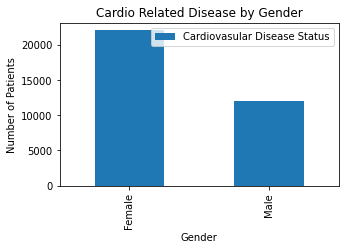

In [21]:
gender_heart_diseases_count.plot(kind="bar", figsize=(5,3))
plt.title("Cardio Related Disease by Gender")
plt.ylabel("Number of Patients")
plt.show()

In [22]:
# Displaying the number of Female Patients with and without cardio_disease 

female_diseases_rate = values_entered.loc[values_entered["Gender"] == "Female"]
female_diseases_rate = female_diseases_rate[["Gender", "Cardiovasular Disease Status"]]
female_diseases_rate = female_diseases_rate.groupby("Cardiovasular Disease Status").count()
female_diseases_rate

,Gender
Cardiovasular Disease Status,
Evidence of Cardio Disease,22051
No Cardio related Diesease,22744


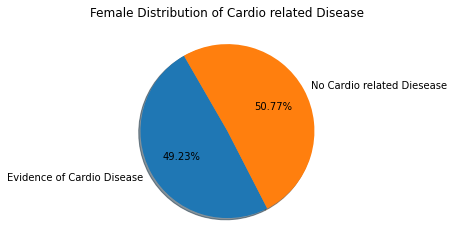

In [23]:
female_diseases_rate.plot.pie(y = "Gender", autopct="%1.2f%%", startangle=120, shadow=True, legend=None)
plt.title("Female Distribution of Cardio related Disease")
plt.ylabel("")
plt.show()

In [24]:
# Displaying the number of Male Patients with and without cardio_disease 

male_diseases_rate = values_entered.loc[values_entered["Gender"] == "Male"]
male_diseases_rate = male_diseases_rate[["Gender", "Cardiovasular Disease Status"]]
male_diseases_rate = male_diseases_rate.groupby("Cardiovasular Disease Status").count()
male_diseases_rate

,Gender
Cardiovasular Disease Status,
Evidence of Cardio Disease,11990
No Cardio related Diesease,11998


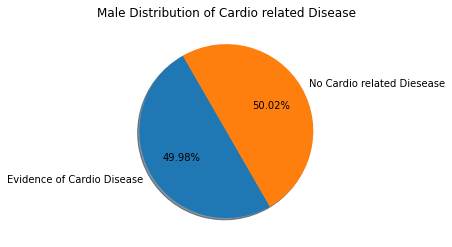

In [25]:
male_diseases_rate.plot.pie(y = "Gender", autopct="%1.2f%%", startangle=120, shadow=True, legend=None)
plt.title("Male Distribution of Cardio related Disease")
plt.ylabel("")
plt.show()

In [26]:
blood_pressure_heart_disease = values_entered.loc[values_entered["Cardiovasular Disease Status"] == "Evidence of Cardio Disease"]
blood_pressure_heart_disease = blood_pressure_heart_disease[["Blood Pressure","Cardiovasular Disease Status"]]
blood_pressure_heart_disease = blood_pressure_heart_disease.groupby("Blood Pressure").count()
blood_pressure_heart_disease = blood_pressure_heart_disease.sort_values("Cardiovasular Disease Status", ascending=False)
blood_pressure_heart_disease

,Cardiovasular Disease Status
Blood Pressure,
High,21203
Normal,9756
Low,3082


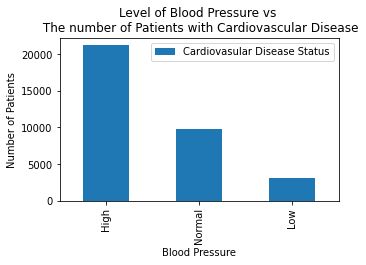

In [27]:
blood_pressure_heart_disease.plot(kind="bar", figsize=(5,3))
plt.title("Level of Blood Pressure vs \n The number of Patients with Cardiovascular Disease")
plt.ylabel("Number of Patients")
plt.show()

In [28]:
blood_pressure_no_heart_disease = values_entered.loc[values_entered["Cardiovasular Disease Status"] == "No Cardio related Diesease"]
blood_pressure_no_heart_disease = blood_pressure_no_heart_disease[["Blood Pressure","Cardiovasular Disease Status"]]
blood_pressure_no_heart_disease = blood_pressure_no_heart_disease.groupby("Blood Pressure").count()
blood_pressure_no_heart_disease = blood_pressure_no_heart_disease.sort_values("Cardiovasular Disease Status", ascending=False)
blood_pressure_no_heart_disease

,Cardiovasular Disease Status
Blood Pressure,
Normal,18201
Low,9456
High,7085


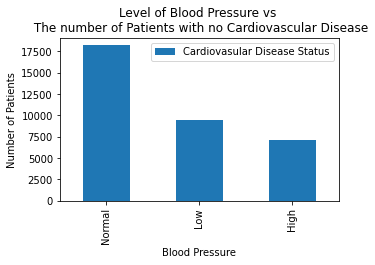

In [29]:
blood_pressure_no_heart_disease.plot(kind="bar", figsize=(5,3))
plt.title("Level of Blood Pressure vs \n The number of Patients with no Cardiovascular Disease")
plt.ylabel("Number of Patients")
plt.show()

In [30]:
# blood_pressure_heart_disease = blood_pressure_heart_disease["CARDIO_DISEASE", ["High", "Normal", "Low"]]

# blood_pressure_no_heart_disease = blood_pressure_no_heart_disease["CARDIO_DISEASE", ["High", "Normal", "Low"]]

# combined_df = display(blood_pressure_heart_disease, blood_pressure_no_heart_disease, pd.concat([blood_pressure_heart_disease, blood_pressure_no_heart_disease]))
# # combined_df.plot(kind="bar", figsize=(5,3))
combined_df = pd.concat([blood_pressure_heart_disease, blood_pressure_no_heart_disease])

<AxesSubplot:xlabel='Blood Pressure'>

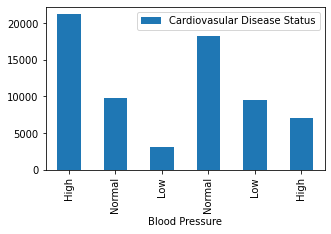

In [31]:
combined_df.plot(kind="bar", figsize=(5,3))

In [32]:
ap_high_heart_disease = values_entered.loc[values_entered["Cardiovasular Disease Status"] == "Evidence of Cardio Disease"]
ap_high_heart_disease = ap_high_heart_disease[["Systolic Blood Pressure","Cardiovasular Disease Status"]]
ap_high_heart_disease

,Systolic Blood Pressure,Cardiovasular Disease Status
1,140,Evidence of Cardio Disease
2,130,Evidence of Cardio Disease
3,150,Evidence of Cardio Disease
7,130,Evidence of Cardio Disease
15,120,Evidence of Cardio Disease
...,...,...
68776,130,Evidence of Cardio Disease
68777,150,Evidence of Cardio Disease
68779,140,Evidence of Cardio Disease
68780,180,Evidence of Cardio Disease


In [36]:
# x_value = ap_high_heart_disease['Systolic Blood Pressure']
# y_value = ap_high_heart_disease['Cardiovasular Disease Status']

# plt.scatter(x_value, y_value, edgecolor="black", linewidths=1, marker="o", alpha = 0.9)

<AxesSubplot:ylabel='Frequency'>

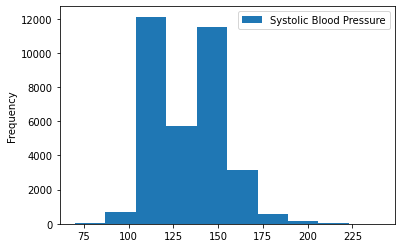

In [34]:
ap_high_heart_disease.plot(kind="hist")